![Alura <](img/logo-alura.svg)
<br><br>
    
## Estatística com Python parte 1: Frequências e Medidas

- Nível: Básico 
- Aluno: Paulo Freitas Nobrega 
- Professor: Rodrigo Fernando Dias 
- Link do curso: https://cursos.alura.com.br/course/estatistica-distribuicoes-e-medidas
<br><br>

##### Dataset: Pesquisa Nacional por Amostra de Domicílios (PNAD) 2015
> O sistema de pesquisas domiciliares, implantado progressivamente no Brasil a partir de 1967, com a criação da **Pesquisa Nacional por Amostra de Domicílios - PNAD**, produz informações básicas para o estudo do desenvolvimento socioeconômico do País.

<br>

### Aula 02: Distribuição de Frequência
Quando se estuda uma variável, o maior interesse do pesquisador é conhecer o comportamento
dessa variável, analisando a ocorrência de suas possíveis realizações. 

Dessa forma, distribuição de frequências é uma tabela em que se resumem grandes quantidades de dados, determinando o número de vezes, que cada dado ocorre (frequência absoluta) e a porcentagem com que aparece (frequência relativa).

---
MORETTIN, BUSSAB. **Estatística básica**. 6. ed. p. 11. São Paulo: Saraiva, 2010.

FERREIRA, Valéria. **Estatística básica**. p. 25. São Paulo: SESES, 2015.

SICSÚ, DANA. **Estatística aplicada**: Análise exploratória de dados. 1. ed. p. 9. São Paulo: Saraiva, 2012.

### Fórmulas e conceitos estatísticos para esta aula.

$n$ = Número de elementos da amostra

$a$ = Amplitude da amostra, onde: $a=max({n}) - min({n})$

$k$ = Número de classes de frequências, onde: $k\cong1+\frac{10}{3}log_{10}~n$
> Há outras fórmulas para encontrar o valor de k. Algumas estão citadas abaixo.

$h$ = Amplitude de classe de frequência, onde: $h=\frac{a}{k}$

$f$ = Frequência absoluta ou simplesmente frequência é o número de vezes, que cada dado aparece amostra.

$p$ = Frequência Relativa ou Proporção é o quociente da frequência absoluta
pelo número total de elementos da amostra, onde: $p=\frac{f}{n}$
> As frequências relativas são, em geral, expressas em porcentagem (%). Você pode entende-la como proporção, probabilidade ou porcentagem de uma variável.

In [1]:
# Bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt

# Aplicando Estilo Matplotlib
plt.style.use('seaborn')

# Importando Dataset
d = pd.read_csv('dados.csv')
d.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Distribuição de Frequência Qualitativa

As variáveis qualitativas podem ser classificadas como qualitativas `nominais` ou `ordinais`. Se existir uma ordenação natural, elas são classificadas como qualitativas ordinais. Caso contrário, elas são classificadas como variáveis qualitativas nominais. Por exemplo, variáveis como gênero (masculino e feminino) e estado civil (solteiro, casado, viúvo, etc.) são classificadas como qualitativas
nominais. Agora, variáveis como desempenho de um profissional (péssimo, regular ou bom) e grau de instrução (ensino fundamental, ensino médio, superior) são classificadas como qualitativas ordinais.

> Podemos atribuir códigos numéricos às categorias de respostas de algumas variáveis qualitativas. Por exemplo, para a variável gêner, podemos associar o código 1 para o sexo feminino e 2 para o sexo masculino. Mas isto não a torna uma variável quantitativa, ou seja, não podemos, por exemplo, calcular uma média destas respostas, pois não conseguiríamos interpretar o resultado obtido.

---
FERREIRA, Valéria. **Estatística básica**. p. 14, 15. São Paulo: SESES, 2015.

##### Criando Distribuição de Frequência através do método value_counts() do pandas

`value_counts()` Devolve uma Series contendo valores únicos como seu índice e as frequências como seus valores; a ordem dos contadores é decrescente.

In [2]:
# Distribuição de Freq. Qualitativa: Sexo
# Dicionário de Genero
genero = {
    0: 'Masculino',
    1: 'Feminino'
}

#Series frequencias (Absoluta e Relativa)
freq_abs = d['Sexo'].value_counts()
freq_rel = d['Sexo'].value_counts(normalize=True) * 100

# DataFrame frequencias de sexo
df_sexo = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_sexo.rename(index=genero, inplace=True)

# Renomeacao de coluna de indices
df_sexo.rename_axis('Sexo', axis='columns', inplace=True)
df_sexo.head()

Sexo,Frequência,Porcentagem (%)
Masculino,53250,69.299844
Feminino,23590,30.700156


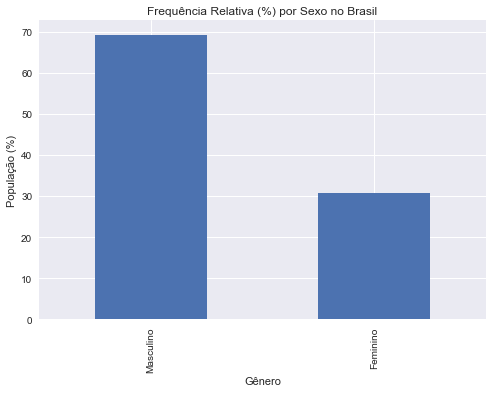

In [3]:
# Plotagem: Frequencia relativa (Sexo)
df_sexo.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Sexo no Brasil'
);
plt.ylabel('População (%)')
plt.xlabel('Gênero')
plt.show();

In [4]:
# Distribuição de Freq. Qualitativa: Raça
# Dicionário de Raça
raca = {
    0: 'Indigena',
    2: 'Branca',
    4: 'Preta',
    6: 'Amarela',
    8: 'Parda',
    9: 'Sem Declaração'
}

#Series frequencias (Absoluta e Relativa)
freq_abs = d['Cor'].value_counts()
freq_rel = d['Cor'].value_counts(normalize=True) * 100

# DataFrame frequencias de raca
df_raca = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de indices
df_raca.rename(index=raca, inplace=True)

# Renomeacao de coluna de indices
df_raca.rename_axis('Raça', axis='columns', inplace=True)
df_raca.head()

Raça,Frequência,Porcentagem (%)
Parda,35925,46.752993
Branca,31815,41.404217
Preta,8391,10.920094
Indigena,357,0.464602
Amarela,352,0.458095


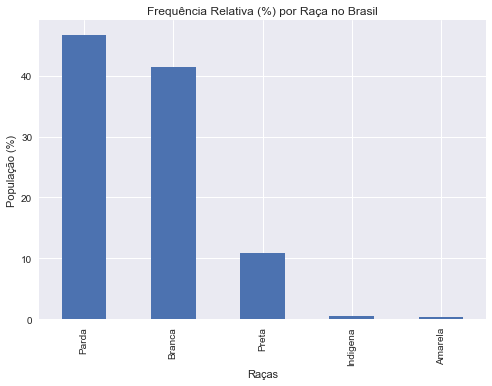

In [5]:
# Plotagem: Frequencia relativa (Raça)
df_raca.iloc[:,-1].plot(
    kind='bar', 
    title='Frequência Relativa (%) por Raça no Brasil'
);
plt.ylabel('População (%)')
plt.xlabel('Raças')
plt.show();

##### Criando Distribuição de Frequência com cruzamento de features através da função cosstrab()

`pd.crosstab()` Calcula uma tabulação cruzada simples de duas (ou mais) `feature` que pode mostrar a frequência com que determinados grupos de dados aparecem. Por padrão, retorna uma tabela de frequência absoluta.

> Uma necessidade comum em uma tabela de referência cruzada é incluir subtotais. Podemos adicioná-los usando a palavra-chave `margens` como parâmetro de `crosstab`.

In [6]:
# Distribuição de Freq. Qualitativa Anos de Estudo - Utilizando a funcao crosstab
# Dicionario de Anos de Estudos
estudos = {
    1: 'Sem instrução e menos de 1 ano',
    2: '1 ano',
    3: '2 anos',
    4: '3 anos',
    5: '4 anos',
    6: '5 anos',
    7: '6 anos',
    8: '7 anos',
    9: '8 anos',
    10: '9 anos',
    11: '10 anos',
    12: '11 anos',
    13: '12 anos',
    14: '13 anos',
    15: '14 anos',
    16: '15 anos ou mais',
    17: 'Não determinados'
}

# Distribuicao de frequencia absoluta
# Features: Anos de Estudo e Sexo
freq_abs = pd.crosstab(d['Anos de Estudo'],
                       d['Sexo'],
                       margins=True,
                       margins_name="Total")

# Incluindo rotulos de linhas e colunas
freq_abs.rename(index=estudos, inplace=True)
freq_abs.rename(columns=genero, inplace=True)
freq_abs.head(20)

Sexo,Masculino,Feminino,Total
Anos de Estudo,,,
Sem instrução e menos de 1 ano,4476,1373,5849
1 ano,1081,307,1388
2 anos,1637,464,2101
3 anos,2227,664,2891
4 anos,5020,1709,6729
5 anos,3247,1252,4499
6 anos,1790,655,2445
7 anos,1942,747,2689
8 anos,5700,2280,7980


In [7]:
# Crosstab com funções agregadoras
# Distribuicao de anos de estudo (Homem/Mulher) agregando a media de renda
freq_abs = pd.crosstab(d['Anos de Estudo'],
                      d['Sexo'],
                      aggfunc='mean',
                      values=d['Renda'])

# Incluindo rotulos de linhas e colunas
freq_abs.rename(index=estudos, inplace=True)
freq_abs.rename(columns=genero, inplace=True)

print('A renda média entre homem/mulher baseada nos anos de estudo')
freq_abs.head(20)

A renda média entre homem/mulher baseada nos anos de estudo


Sexo,Masculino,Feminino
Anos de Estudo,,
Sem instrução e menos de 1 ano,799.494638,516.201748
1 ano,895.629047,492.771987
2 anos,931.178986,529.911638
3 anos,1109.203862,546.853916
4 anos,1302.329283,704.279111
5 anos,1338.653218,781.389776
6 anos,1448.875419,833.732824
7 anos,1465.497940,830.751004
8 anos,1639.396667,933.615351


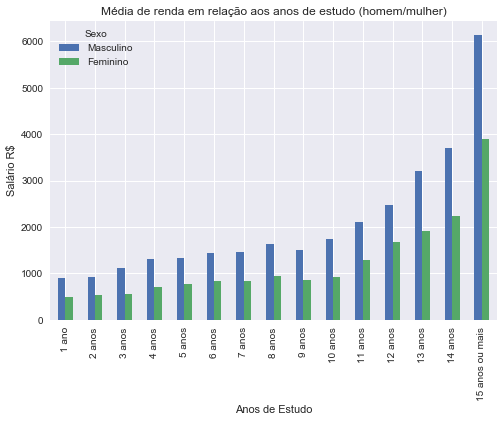

In [8]:
# Plotagem: Relacao anos de estudo x média de renda (homem/mulher)
freq_abs.iloc[1:-1].plot(
    kind='bar',    
    title='Média de renda em relação aos anos de estudo (homem/mulher)'
)
plt.ylabel('Salário R$')
plt.show()

### Distribuição de Frequência Quantitativa

Variáveis quantitativas podem ser classificadas como quantitativas `discretas` ou `contínuas`. As variáveis quantitativas discretas são resultantes de uma operação de contagem, assumindo respostas cujos números são inteiros. Já as variáveis quantitativas contínuas são resultantes de mensurações, assumindo valores que pertencem a um intervalo de números reais, ou seja, números decimais. Por exemplo, número de faltas ao trabalho por motivo de saúde (0, 1, 2,...) e número de peças defeituosas em um lote (0, 1, 2, 3,...) são classificadas como quantitativas discretas, enquanto que peso,
altura, renda familiar (salários mínimos) são classificadas como quantitativas contínuas.

---
FERREIRA, Valéria. **Estatística básica**. p. 14, 15. São Paulo: SESES, 2015.

In [9]:
# Distribuição de Freq. Quantitativa com classes de renda
# Lista de limites de renda
limites = [
    d['Renda'].min(),
    1576,
    3152,
    7880,
    15760,
    d['Renda'].max()
]

# Lista de rótulos para os limites
rotulos = ['E', 'D', 'C', 'B', 'A']

# Series (indice dataset x rotulo)
classes = pd.cut(x=d['Renda'],
       bins=limites,
       labels=rotulos,
       include_lowest=True)

#Series frequencias (Absoluta e Relativa)
freq_abs = classes.value_counts()
freq_rel = classes.value_counts(normalize=True) * 100

# DataFrame frequencias de renda
df_renda = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})

# Renomeacao de coluna de indices e ordenacao
df_renda.rename_axis('Classes Sociais', axis='columns', inplace=True)
df_renda.sort_index(ascending=False, inplace=True)
df_renda.head()

Classes Sociais,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


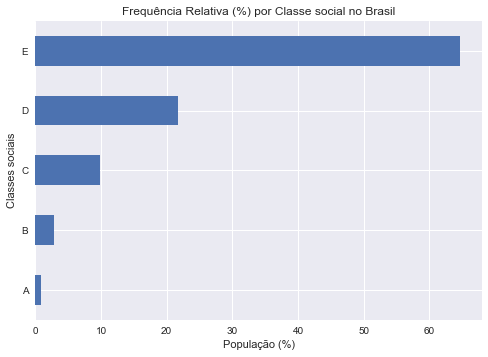

In [10]:
# Plotagem: Frequencia relativa (Classe Social)
df_renda.iloc[:,-1].plot(
    kind='barh', 
    title='Frequência Relativa (%) por Classe social no Brasil'
)
plt.xlabel('População (%)')
plt.ylabel('Classes sociais')

plt.show();

### Distribuição de Frequência Quantitativa com Classes de Amplitude Fixa

Podemos usar o bom senso e escolher arbitrariamente quantas classes e qual a amplitude
que estas classes devem ter. Contudo, não há uma regra única para definir-se o número de classes de uma distribuição de frequência. Pois, se este número for muito pequeno, perde-se informação, podendo camuflar variações interessantes na distribuição. Por outro lado, um grande número de classes não contribui com o objetivo de ter uma melhor visualização da distribuição de valores. Em geral, recomenda-se tomar de **5 a 25 classes** de frequência. 

Há algumas regras sugeridas para encontrar um número recomendado de classes. Onde, o número de classes será o inteiro próximo de k. 

Seguem algumas dessas regras: <br><br>

|Raiz Quadrada de n | Regra de Sturges                 | Regra de Rice          |
|:----------------: | :------------------------------: | :---------------------:|
|$k\cong\sqrt{n}$   | $k\cong1+\frac{10}{3}log_{10}~n$ | $k\cong2n^\frac {1}{3}$|

<br>

---
FERREIRA, Valéria. **Estatística básica**. p. 30. São Paulo: SESES, 2015.

SICSÚ, DANA. **Estatística aplicada**: Análise exploratória de dados. 1. ed. p. 17. São Paulo: Saraiva, 2012.

In [11]:
# Simulando o crescimento diretamente proporcional de número 
# de classes (k) pelo tamanho da amostra (n)

# Funcoes geradoras de número de classes (k)
def sqrt(n: int) -> int:
    """Regra da Raiz Quadara."""
    k = n**(1/2)
    return int(round(k, 0))


def sturges(n: int) -> int:
    """Regra de Sturges"""
    k = 1 + (10/3) * np.log10(n)
    return int(round(k, 0))


def rice(n: int) -> int:
    """Regra de Rice"""
    k = 2*n**(1/3)
    return int(round(k, 0))

In [12]:
# Gerando serie de amostra: 1, 10, 100, 1000 e 10000
# Aplicando os calculos de numero de classes (k)
s = lambda x, y, z: [[int(i),
                      sturges(i),
                      rice(i),
                      sqrt(i)] for i in np.geomspace(x,y,z)]

# DataFrame numero de classes
df_classes = pd.DataFrame(s(1, 10000, 5))

# Renomeacao de colunas
df_classes.columns = [
    'Nº de elementos na Amostras',
    'Regra de Sturges', 
    'Regra de Rice', 
    'Regra da Raiz Quadrada'
]

# Renomeacao de coluna de indices
df_classes.set_index('Nº de elementos na Amostras', inplace=True)
df_classes.head()

,Regra de Sturges,Regra de Rice,Regra da Raiz Quadrada
Nº de elementos na Amostras,,,
1,1,2,1
10,4,4,3
100,8,9,10
1000,11,20,32
10000,14,43,100


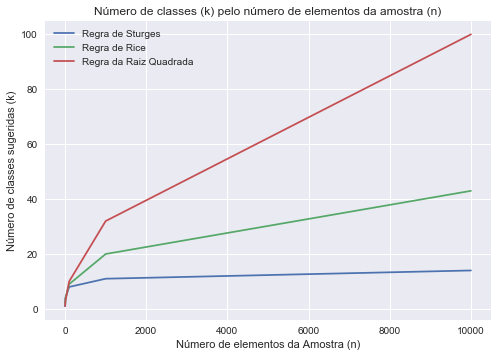

In [13]:
# Plotagem: Crescimento de Número de classes
df_classes.plot(
    title = 'Número de classes (k) pelo número de elementos da amostra (n)'
)
plt.xlabel('Número de elementos da Amostra (n)')
plt.ylabel('Número de classes sugeridas (k)')
plt.show();

### Distribuição de Frequência Quantitativa de Renda Utilizando a Regra de Sturges para o Cálculo de K

A regra Sturges é um método empírico amplamente utilizado em estatística descritiva para determinar o número de classes que devem existir em um histograma de frequência, a fim de classificar um conjunto de dados representando uma amostra ou população.

A fórmula de Sruges: 

$k\cong1+\frac{10}{3}log_{10}~n$

A fórmula para amplitude das classes, isto é, a largura de cada barra representada no histograma de frequência é dada por:

$h=\frac{n_{max} - n_{min}}{k}$

In [14]:
# Calculando k
k = sturges(d['Renda'].shape[0])

# Gerando serie classes com amplitude fixa
classes = pd.cut(x=d['Renda'],
                bins=k,
                include_lowest=True)

# Serie frequencias (Absoluta e Relativa)
freq_abs = classes.value_counts(sort=False)
freq_rel = classes.value_counts(normalize=True, sort=False) * 100

# DataFrame frequencias de renda com classes de amplitude fixa
df_renda2 = pd.DataFrame({
    'Frequência': freq_abs,
    'Porcentagem (%)': freq_rel
})
df_renda2.head(17)

,Frequência,Porcentagem (%)
"(-200.001, 11764.706]",75594,98.378449
"(11764.706, 23529.412]",1022,1.330036
"(23529.412, 35294.118]",169,0.219938
"(35294.118, 47058.824]",19,0.024727
"(47058.824, 58823.529]",16,0.020822
"(58823.529, 70588.235]",5,0.006507
"(70588.235, 82352.941]",4,0.005206
"(82352.941, 94117.647]",1,0.001301
"(94117.647, 105882.353]",6,0.007808
"(105882.353, 117647.059]",0,0.000000


### Histograma

Um histograma é semelhante ao diagrama de barras, porém refere-se a uma distribuição de frequências construída com intervalos de classes. Por isso, apresenta uma diferença: não há espaços entre as barras. Os intervalos de classes são colocados no eixo horizontal enquanto as frequências são colocadas no eixo vertical. As frequências podem ser absolutas ou relativas. 
> Utilizamos a frequência ou a frequência relativa para construir o histograma, desde que
os intervalos de classes tenham mesma amplitude. Caso contrário, temos que encontrar
a densidade de frequência, que é obtida pelo quociente da frequência absoluta pela
amplitude do intervalo de classe.

---
FERREIRA, Valéria. **Estatística básica**. p. 38. São Paulo: SESES, 2015.

In [15]:
df_renda.head()

Classes Sociais,Frequência,Porcentagem (%)
A,608,0.791255
B,2178,2.834461
C,7599,9.889381
D,16700,21.733472
E,49755,64.751432


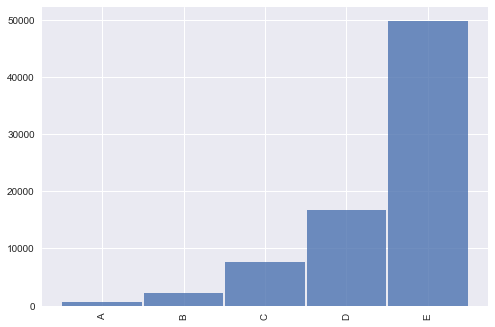

In [16]:
df_renda['Frequência'].plot.bar(width=0.98,
                               alpha=0.8)

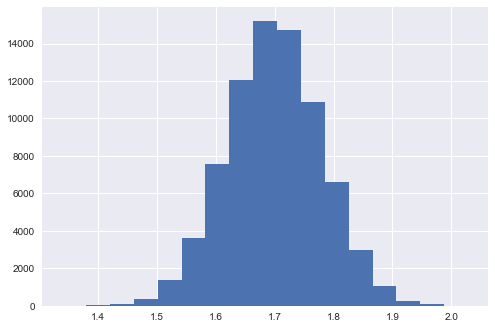

In [17]:
d['Altura'].hist(bins=17)

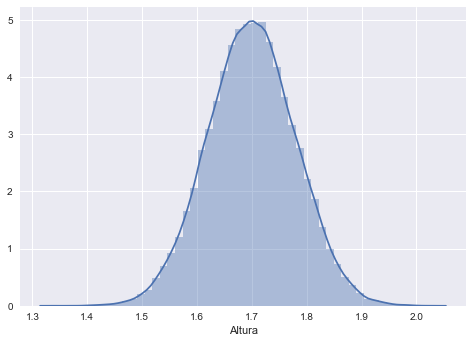

In [18]:
ax = sns.distplot(d['Altura'])
ax

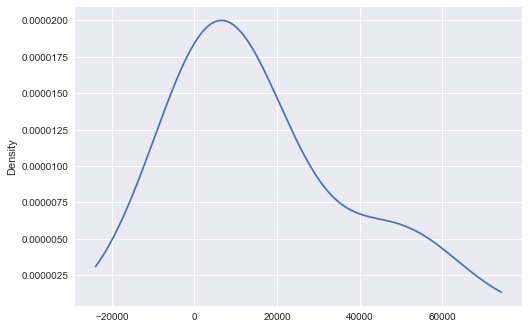

In [20]:
df_renda['Frequência'].plot.kde()